In [101]:
import sys
import os
import os.path
import io
import csv

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# plt.rcParams.update({'font.size': 16})
import pandas as pd
from scipy.stats import gamma

# Generation of SBATCH files

In [58]:
def batchwriter(pathtofile="analyses/scaling_param/",files_name="simul", time=24, nodes=1, ntaskspernode=1, mem=2, partition="normal", params_names=[], params_values=[],pathtoexe="../../meiosis"):
        if os.path.exists(pathtofile)==False:
            os.makedirs(pathtofile)
        batchfile= open("{0}Run_{1}.sh".format(pathtofile,files_name),"w+")
        batchfile.write("#!/bin/bash\n")
        batchfile.write("#SBATCH --partition={0}\n".format(partition))
        batchfile.write("#SBATCH --time={0}:00:00\n".format(time))
        batchfile.write("#SBATCH --nodes={0}\n".format(nodes))
        batchfile.write("#SBATCH --ntasks-per-node={0}\n".format(ntaskspernode))
        batchfile.write("#SBATCH --mem={0}gb\n".format(mem))
        batchfile.write("#SBATCH -o Run_{0}.out\n".format(files_name))
        batchfile.write("#SBATCH -e Run_{0}.err\n".format(files_name))
        batchfile.write("\n")
        batchfile.write(pathtoexe)
        for param in range(len(params_names)):
            batchfile.write(" -"+params_names[param]+" {0}".format(params_values[param]))
        batchfile.write(" Run_{0}".format(files_name))
        batchfile.close()

In [59]:
#batchwriter(files_name="V4",params_names=["u","v","w","N"],params_values=[1e-5,1e-4,1e-2,10000],pathtoexe="./meiosis")
batchwriter()

In [60]:
def scaling_U(params_list=["1e-2","1e-3","1e-4","1e-5","1e-6","1e-7","1e-8"]):
    index_u=1
    path="analyses/scaling_U_{0}/".format(index_u)
    print(os.path.exists(path))
    while os.path.exists(path):
        index_u+=1
        path="analyses/scaling_U_{0}/".format(index_u)
        print(path)
    for i in range (len(params_list)):
        batchwriter(pathtofile=path,files_name="U_{0}".format(params_list[i]), params_names=["u"], params_values=[float(params_list[i])],pathtoexe="../../meiosis")

In [61]:
scaling_U()

True
analyses/scaling_U_2/


In [62]:
def scaling_V(params_list=["1e-2","1e-3","1e-4","1e-5","1e-6","1e-7","1e-8"]):
    index_v=1
    path="analyses/scaling_V_{0}/".format(index_v)
    print(os.path.exists(path))
    while os.path.exists(path):
        index_v+=1
        path="analyses/scaling_V_{0}/".format(index_v)
        print(path)
    for i in range (len(params_list)):
        batchwriter(pathtofile=path,files_name="V_{0}".format(params_list[i]), params_names=["v"], params_values=[float(params_list[i])],pathtoexe="../../meiosis")

In [63]:
scaling_V()

True
analyses/scaling_V_2/


In [64]:
def scaling_N(params_list=["1e3","1e4","1e5","1e6"]):
    index_N=1
    path="analyses/scaling_N_{0}/".format(index_N)
    print(os.path.exists(path))
    while os.path.exists(path):
        index_N+=1
        path="analyses/scaling_N_{0}/".format(index_N)
        print(path)
    for i in range (len(params_list)):
        batchwriter(pathtofile=path,files_name="N_{0}".format(params_list[i]), params_names=["N"], params_values=[float(params_list[i])],pathtoexe="../../meiosis")

In [65]:
scaling_N()

True
analyses/scaling_N_2/
analyses/scaling_N_3/
analyses/scaling_N_4/


# Interpretations

## Scaling

In [19]:
def readfiles(pathtofile, file_name, ext_name):
    data_file = pathtofile+file_name+"."+ext_name
    data = dict()
    params = []
    with io.open(data_file,'r') as f:
        reader = csv.reader(f)
        firstline = True
        for line in reader:
            lin = line[0].split()
            if not firstline:
                for j in range(len(lin)):
                    data[params[j]].append(float(lin[j]))
            else:
                for j in lin:
                    data[j]=[]
                    params.append(j)
                firstline = False
    return (data)

In [30]:
a=readfiles('analyses/scaling_V_2/','Run_V_1e-4','allele')
#len(a["Generation_number"])
print(a)
#print(readfiles("simuU5","trace"))
#sorted(os.listdir('analyses/scaling_V_2/'))

{'Generation_number': [0.0, 0.0, 10.0, 10.0, 10.0, 20.0, 20.0, 30.0, 30.0, 30.0, 40.0, 40.0, 40.0, 50.0, 50.0, 60.0, 60.0, 70.0, 70.0, 80.0, 80.0, 90.0, 90.0, 100.0, 100.0, 110.0, 110.0, 110.0, 120.0, 120.0, 130.0, 130.0, 130.0, 140.0, 140.0, 140.0, 150.0, 150.0, 150.0, 160.0, 160.0, 160.0, 170.0, 170.0, 170.0, 180.0, 180.0, 190.0, 190.0, 200.0, 200.0, 200.0, 210.0, 210.0, 210.0, 220.0, 220.0, 220.0, 220.0, 230.0, 230.0, 230.0, 230.0, 230.0, 240.0, 240.0, 240.0, 240.0, 250.0, 250.0, 260.0, 260.0, 260.0, 260.0, 270.0, 270.0, 270.0, 280.0, 280.0, 280.0, 280.0, 280.0, 290.0, 290.0, 290.0, 290.0, 300.0, 300.0, 300.0, 300.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 320.0, 320.0, 320.0, 320.0, 330.0, 330.0, 330.0, 330.0, 340.0, 340.0, 340.0, 350.0, 350.0, 350.0, 350.0, 360.0, 360.0, 360.0, 360.0, 370.0, 370.0, 370.0, 380.0, 380.0, 380.0, 380.0, 390.0, 390.0, 390.0, 390.0, 400.0, 400.0, 400.0, 400.0, 410.0, 410.0, 410.0, 410.0, 420.0, 420.0, 420.0, 430.0, 430.0, 430.0, 430.0, 430.0, 440.0, 4

In [8]:
def readscalingexperiment(target_folder_path , scaling_param_name, param_names_allele, param_names_trace):
    list_files = sorted(os.listdir(target_folder_path))
    stat_dict_allele = dict()
    for param in param_names_allele:
        stat_dict_allele[scaling_param_name]=[]
        stat_dict_allele[param+"_mean"]=[]
        stat_dict_allele[param+"_variance"]=[]
    stat_dict_trace = dict()
    for param in param_names_trace:
        stat_dict_trace[scaling_param_name]=[]
        stat_dict_trace[param+"_mean"]=[]
        stat_dict_trace[param+"_variance"]=[]
    for file_name in list_files :
        if file_name.split(".")[1]=="allele" :
            stat_dict_allele[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))
            data_file = readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1])
            for key in data_file.keys():
                (stat_dict_allele[key+"_mean"]).append(np.mean(data_file[key]))
                (stat_dict_allele[key+"_variance"]).append(np.var(data_file[key]))
        elif file_name.split(".")[1]=="trace" :
            stat_dict_trace[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))
            data_file = readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1])
            for key in data_file.keys():
                (stat_dict_trace[key+"_mean"]).append(np.mean(data_file[key]))
                (stat_dict_trace[key+"_variance"]).append(np.var(data_file[key]))
    return (stat_dict_allele,stat_dict_trace)

In [78]:
def graph_per_allele(target_folder_path, file_name, ext_name, x_axis_param, y_axis_param):
    data = readfiles(target_folder_path, file_name, ext_name)
    x_per_allele=dict()
    y_per_allele=dict()
    for i in range(len(data["Generation_number"])):
        cle = data['Allele_number'][i]
        if ((str(cle) in x_per_allele) == False and cle!=-3):
            x_per_allele[str(cle)]=[]
            x_per_allele[str(cle)].append(data[x_axis_param][i])
            y_per_allele[str(cle)]=[]
            y_per_allele[str(cle)].append(data[y_axis_param][i])
        elif ((str(cle) in x_per_allele) == True and cle!=-3):
            x_per_allele[str(cle)].append(data[x_axis_param][i])
            y_per_allele[str(cle)].append(data[y_axis_param][i])
    return(x_per_allele,y_per_allele)

In [79]:
(X,Y)=graph_per_allele("analyses/scaling_V_2/", 'Run_V_1e-4', 'allele', "q_allele", "Age")

In [82]:
#print(X)

In [83]:
#print(Y)

Text(0.5,0,'Age')

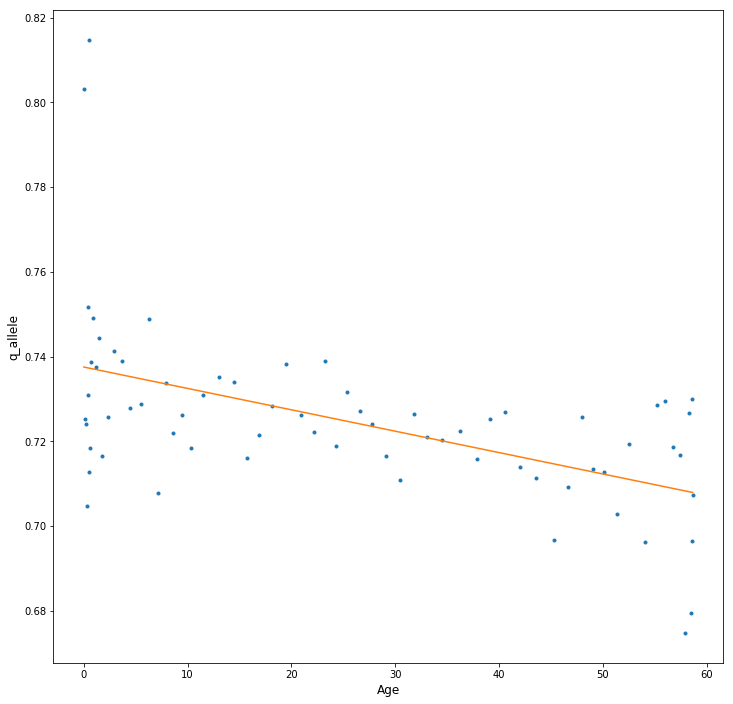

In [112]:
allele_nb = '73.0'
(X,Y)=graph_per_allele("analyses/scaling_V_2/", 'Run_V_1e-4', 'allele', "Age", "q_allele")
lm1 = LinearRegression().fit(np.array(X[allele_nb]).reshape(-1, 1), np.array(Y[allele_nb]))
plt.figure(1, figsize=(12,12))
plt.plot(X[allele_nb], Y[allele_nb], '.')
plt.plot(X[allele_nb], lm1.predict(np.array(X[allele_nb]).reshape(-1, 1)))
plt.ylabel('q_allele', fontsize = 12)
plt.xlabel('Age', fontsize = 12)

In [113]:
score_lm1 = r2_score(np.array(Y[allele_nb]),lm1.predict(np.array(X[allele_nb]).reshape(-1, 1)))
print("R2 score : ",score_lm1)
print('intercept:', lm1.intercept_)
print('slope:', lm1.coef_)

R2 score :  0.269792224568
intercept: 0.7375572852
slope: [-0.00050471]


In [9]:
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_2/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q"])

In [10]:
#allele

In [11]:
#trace

Pour le moment, je prend toute la simul, je ne commence pas a l'etat stationnaire

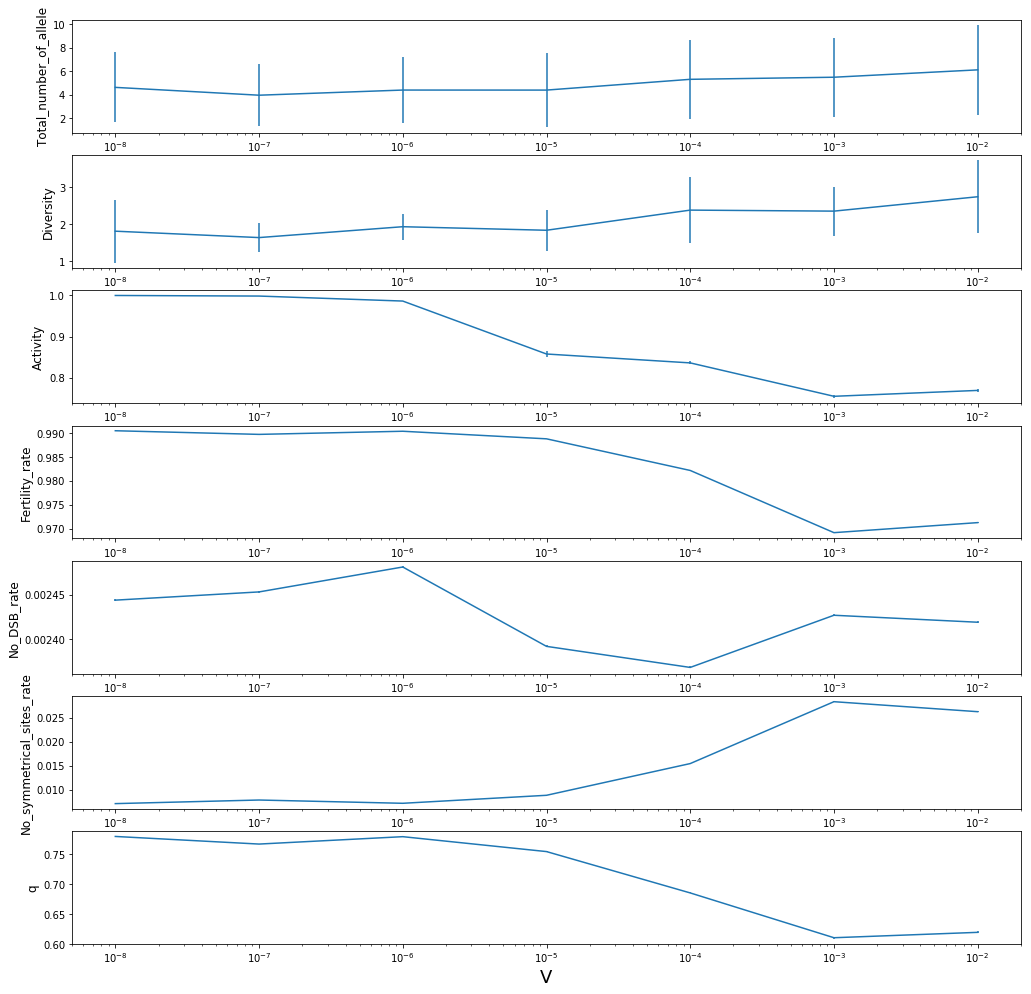

In [12]:
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_2/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q"])
scaling_param_name="V"
param_to_plot=["Total_number_of_allele","Diversity","Activity","Fertility_rate","No_DSB_rate","No_symmetrical_sites_rate","q"]
n=len(param_to_plot)

plt.figure(1, figsize=(17,17))
for index_parameter in range(n):
    plt.subplot(n,1,index_parameter+1)
    plt.errorbar(trace[scaling_param_name], trace[param_to_plot[index_parameter]+'_mean'], trace[param_to_plot[index_parameter]+'_variance'])
    plt.xscale('log')
    plt.ylabel(param_to_plot[index_parameter], fontsize = 12)
    plt.xlabel(scaling_param_name, fontsize = 18)

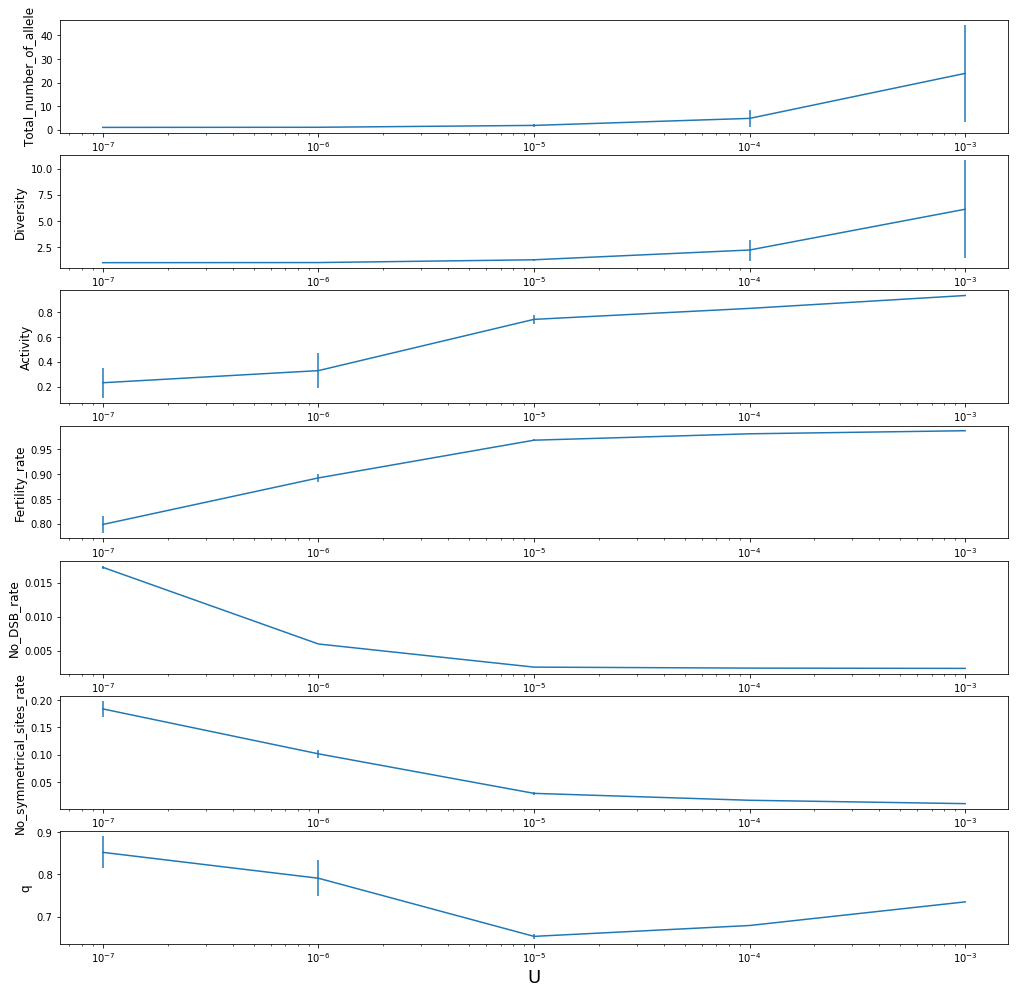

In [16]:
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_2/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q"])
scaling_param_name="U"
param_to_plot=["Total_number_of_allele","Diversity","Activity","Fertility_rate","No_DSB_rate","No_symmetrical_sites_rate","q"]
n=len(param_to_plot)

plt.figure(1, figsize=(17,17))
for index_parameter in range(n):
    plt.subplot(n,1,index_parameter+1)
    plt.errorbar(trace[scaling_param_name][1:6], trace[param_to_plot[index_parameter]+'_mean'][1:6], trace[param_to_plot[index_parameter]+'_variance'][1:6])
    plt.xscale('log')
    #plt.yscale('log')
    plt.ylabel(param_to_plot[index_parameter], fontsize = 12)
    plt.xlabel(scaling_param_name, fontsize = 18)

## Individual

In [164]:
def plot_data(target_folder_path,params_names):
    list_files = sorted(os.listdir(target_folder_path))
    #plt.figure(1, figsize=(20,20))
    index_line=1
    #n=(len(list_files)/6)*len(params_names)
    for file_name in list_files :
        if file_name.split(".")[1]=="allele" :
            plt.figure(1, figsize=(20,20))
            data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1])
            #print(params)
            plt.subplot(len(list_files)/6,1,index_line)
            plt.plot(data_file["Generation_number"], data_file[params_names],'.')
            plt.ylabel(params_names, fontsize = 12)
            plt.xlabel("Generation_number"+"_for_run_"+(file_name.split(".")[0]).split("_")[2], fontsize = 12)
            index_line=index_line+1

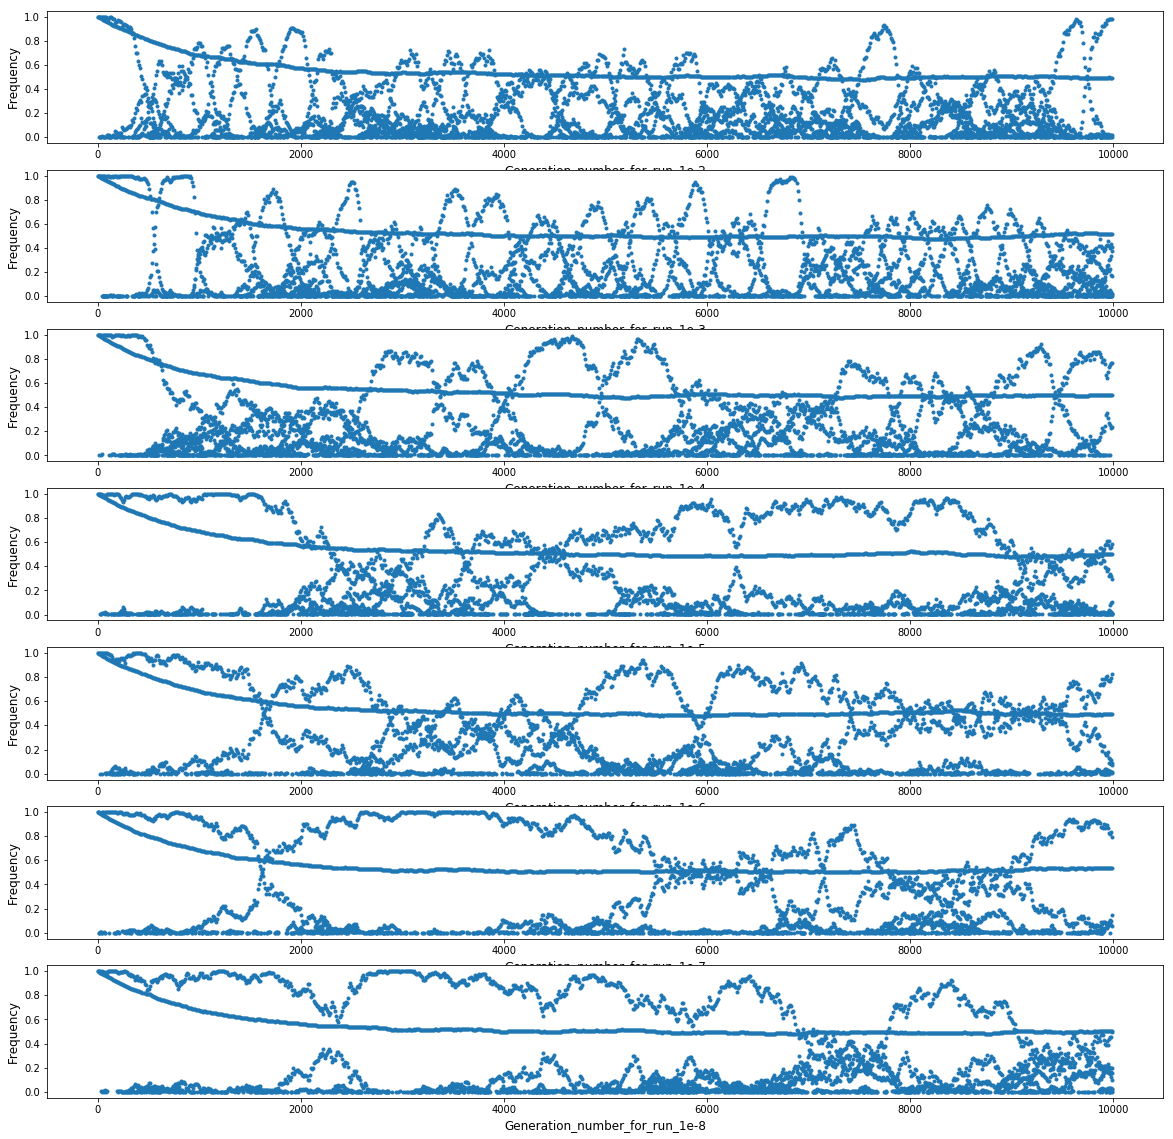

In [165]:
#params_names=["Frequency","Activity","Age","q_allele"]
plot_data(target_folder_path="analyses/scaling_V_2/",params_names="Frequency")

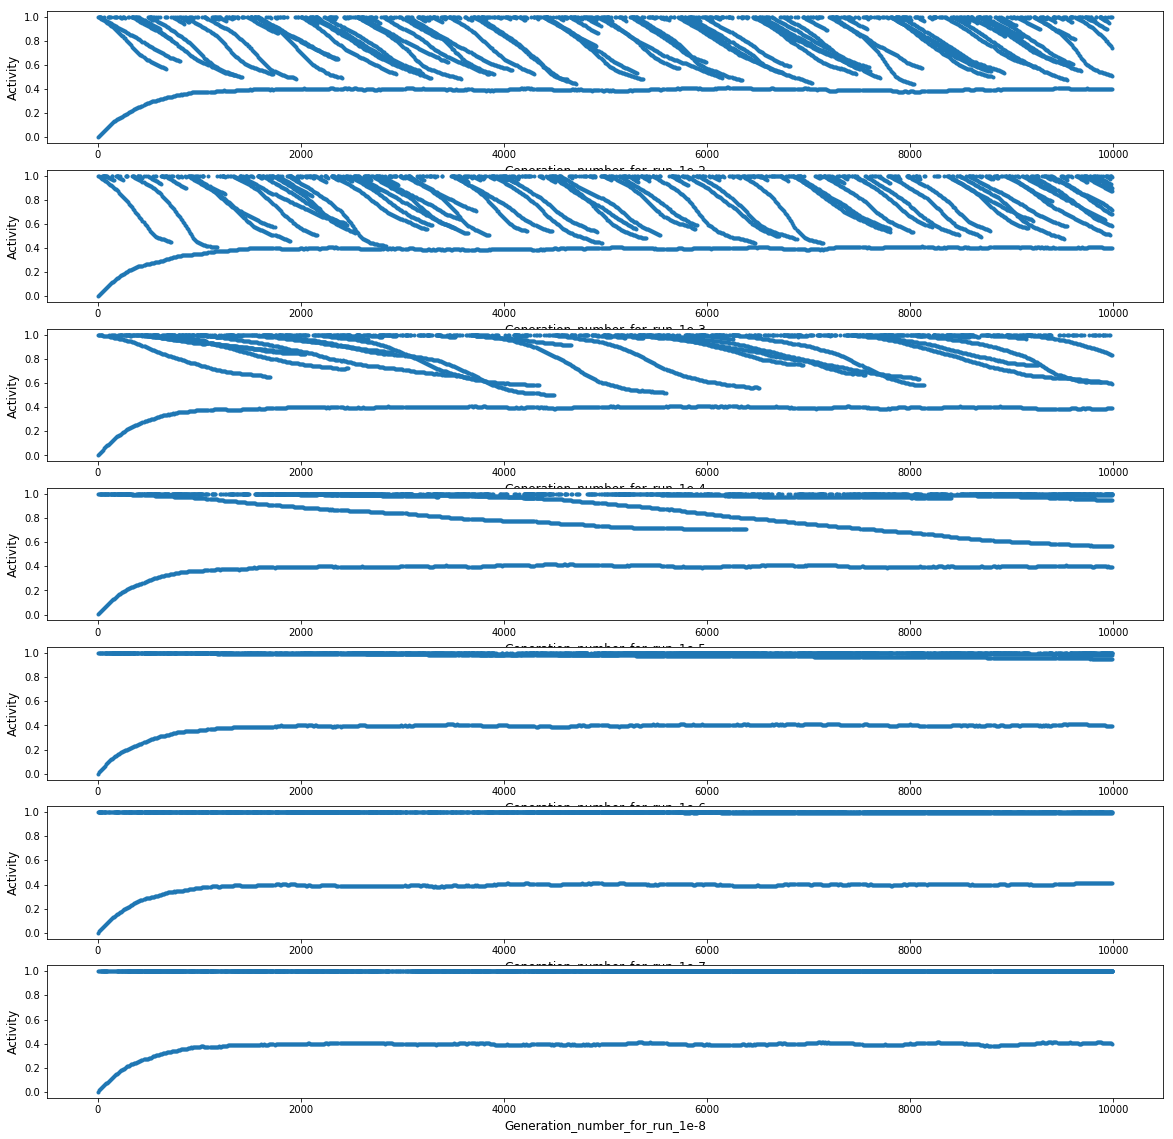

In [166]:
#params_names=["Frequency","Activity","Age","q_allele"]
plot_data(target_folder_path="analyses/scaling_V_2/",params_names="Activity")

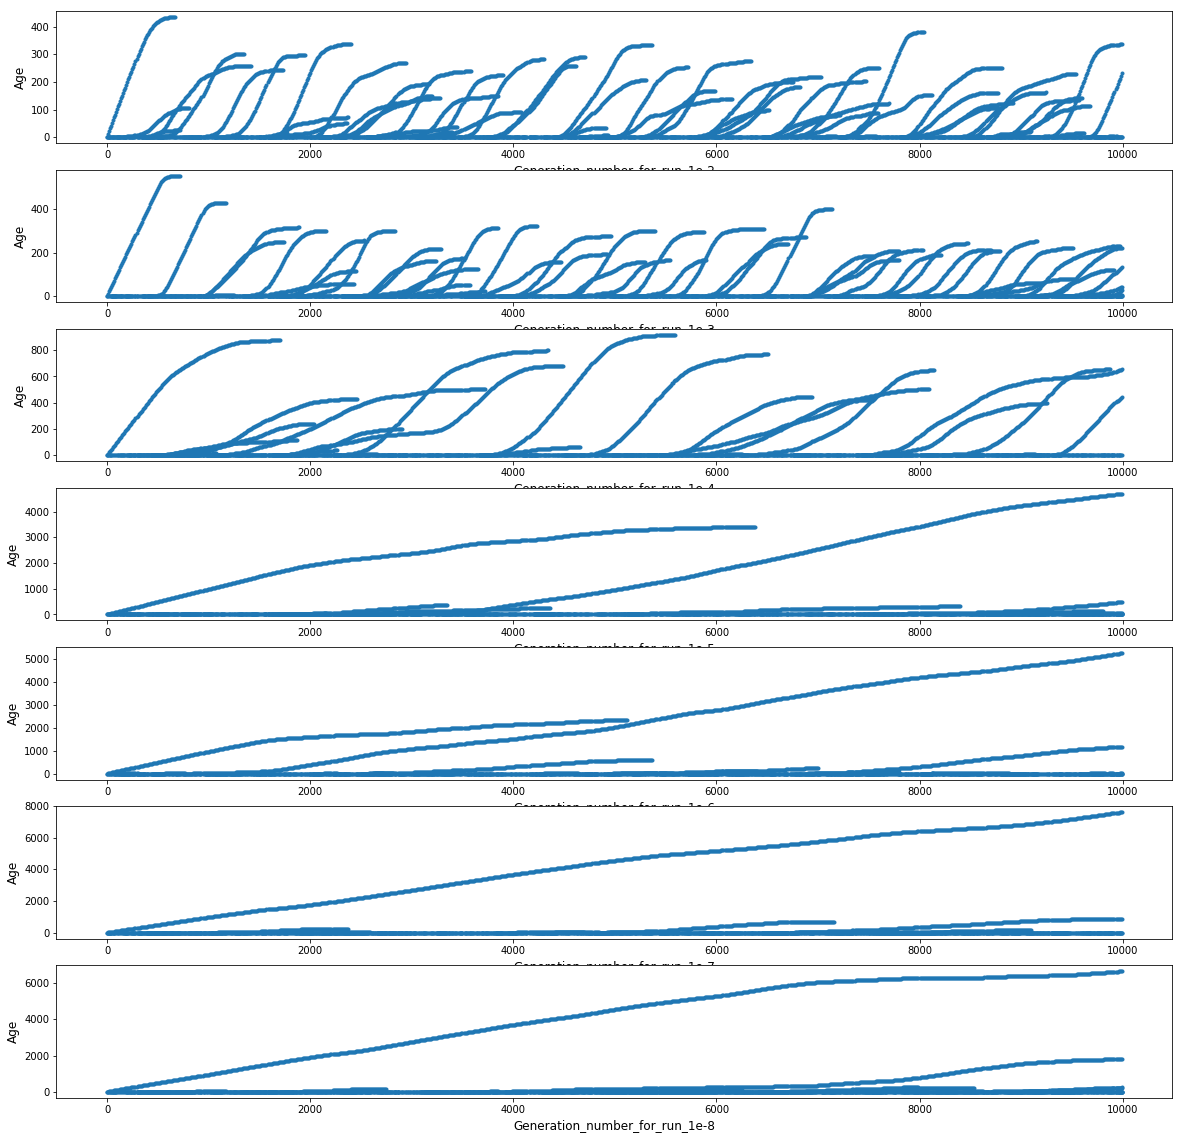

In [167]:
#params_names=["Frequency","Activity","Age","q_allele"]
plot_data(target_folder_path="analyses/scaling_V_2/",params_names="Age")

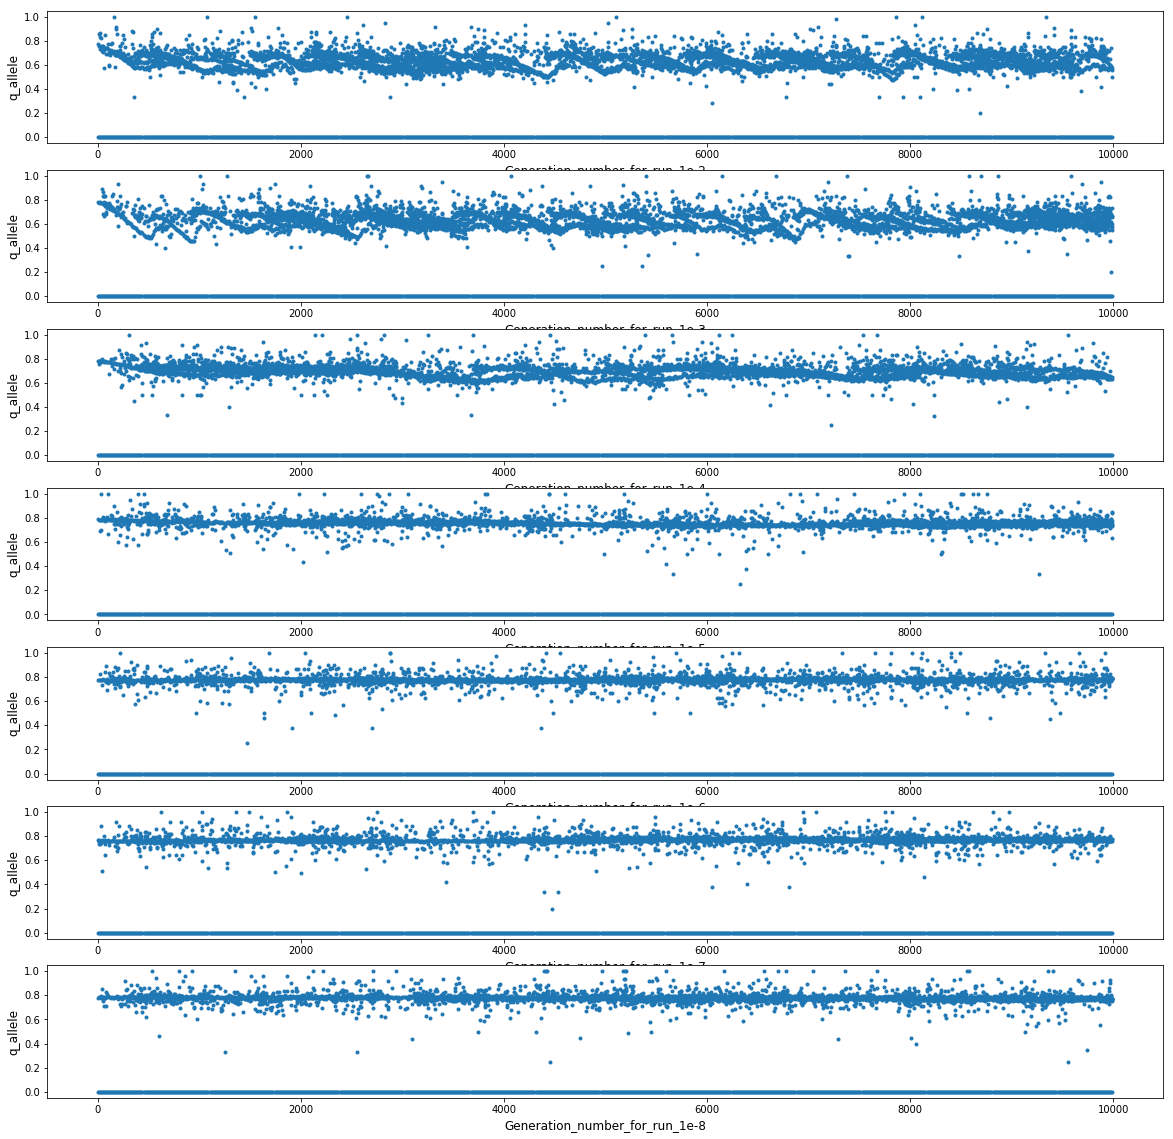

In [168]:
#params_names=["Frequency","Activity","Age","q_allele"]
plot_data(target_folder_path="analyses/scaling_V_2/",params_names="q_allele")

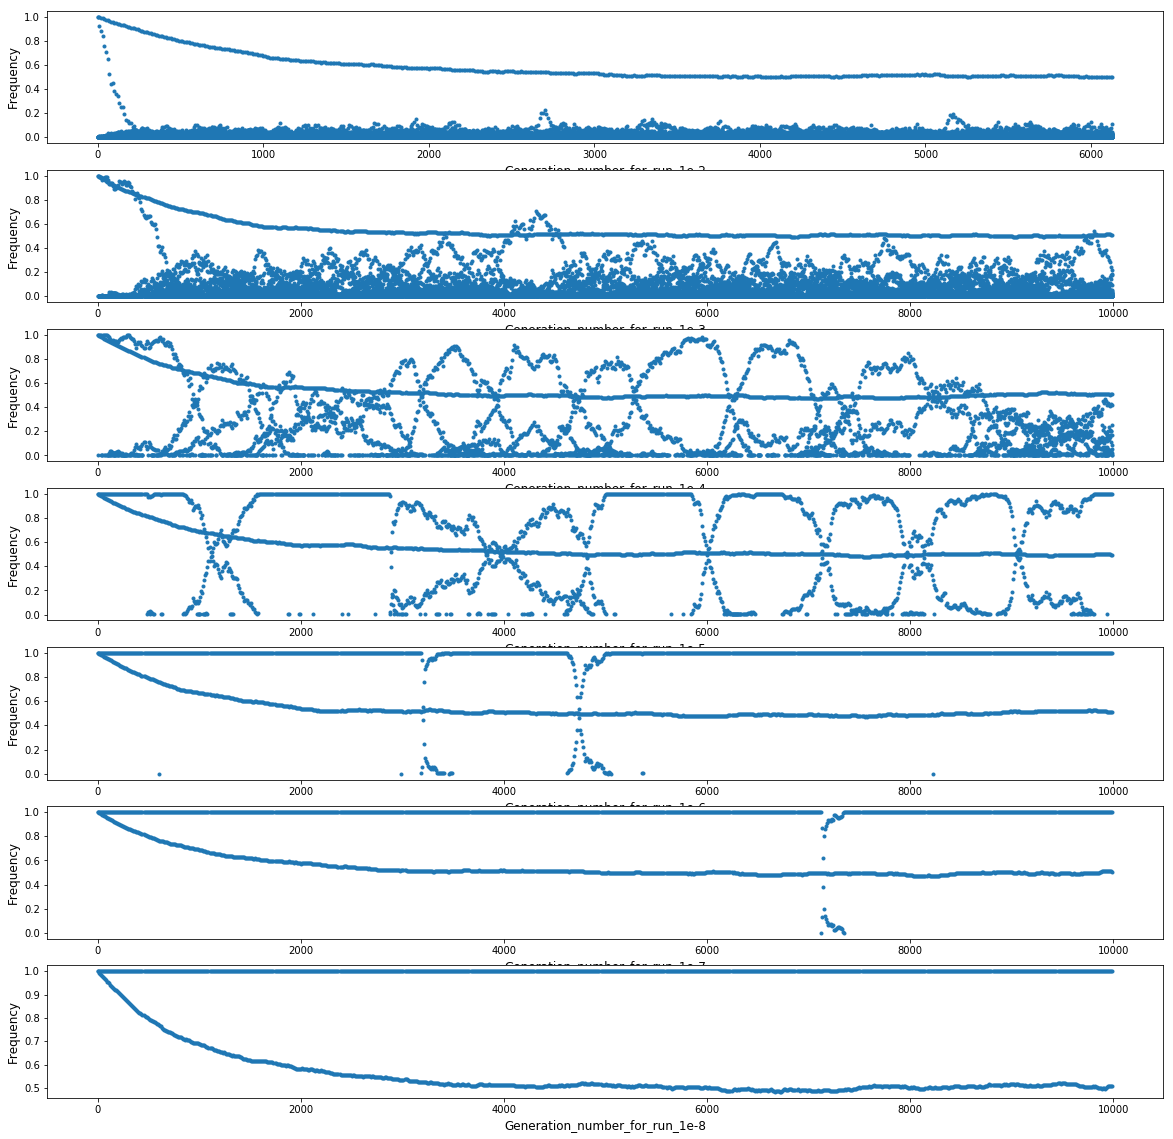

In [170]:
#params_names=["Frequency","Activity","Age","q_allele"]
plot_data(target_folder_path="analyses/scaling_U_2/",params_names="Frequency")

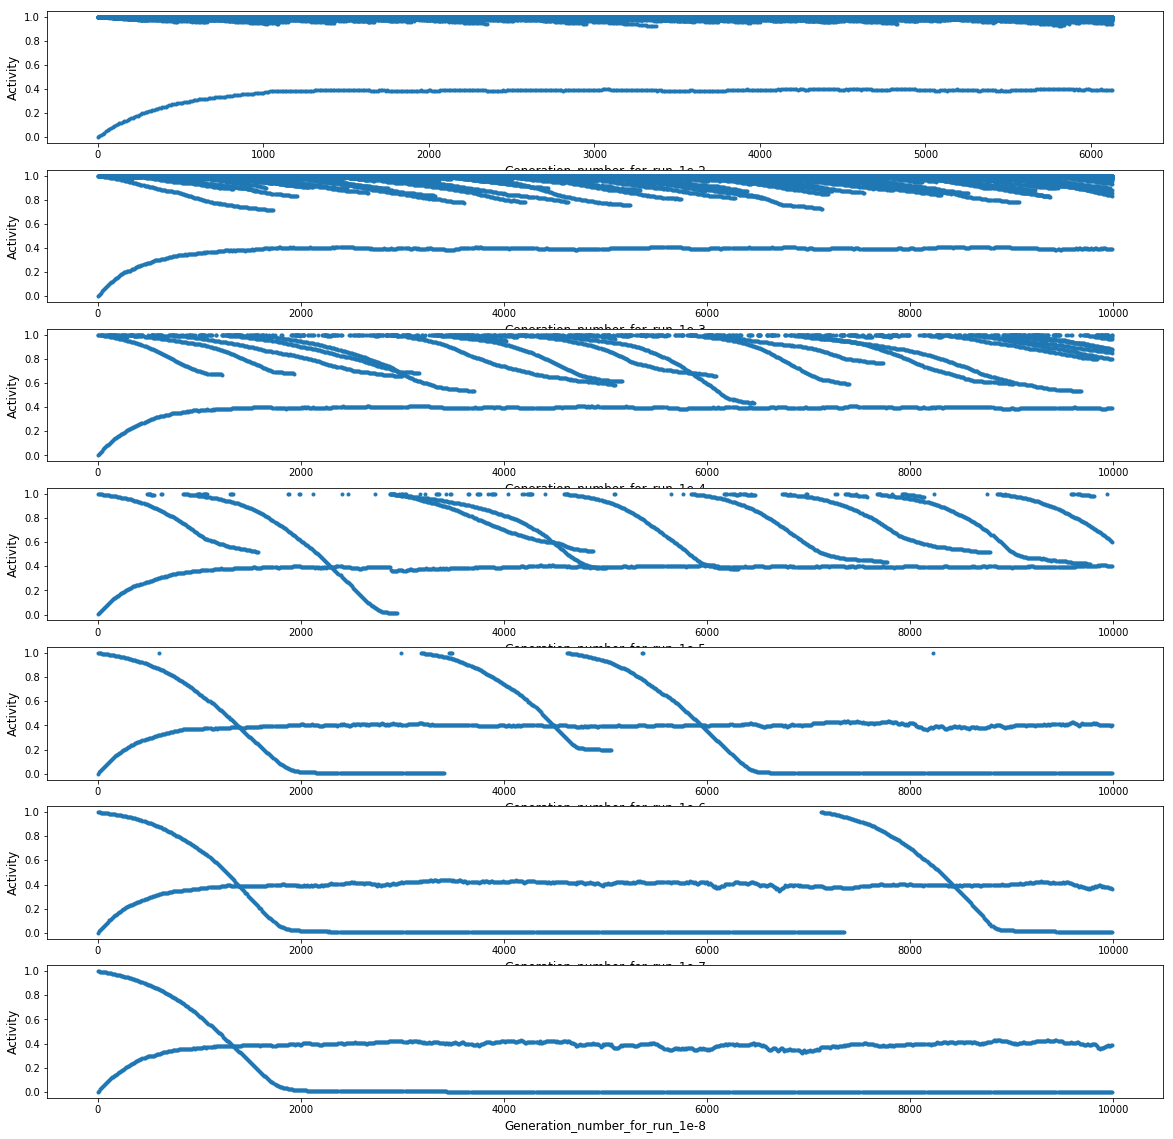

In [171]:
#params_names=["Frequency","Activity","Age","q_allele"]
plot_data(target_folder_path="analyses/scaling_U_2/",params_names="Activity")

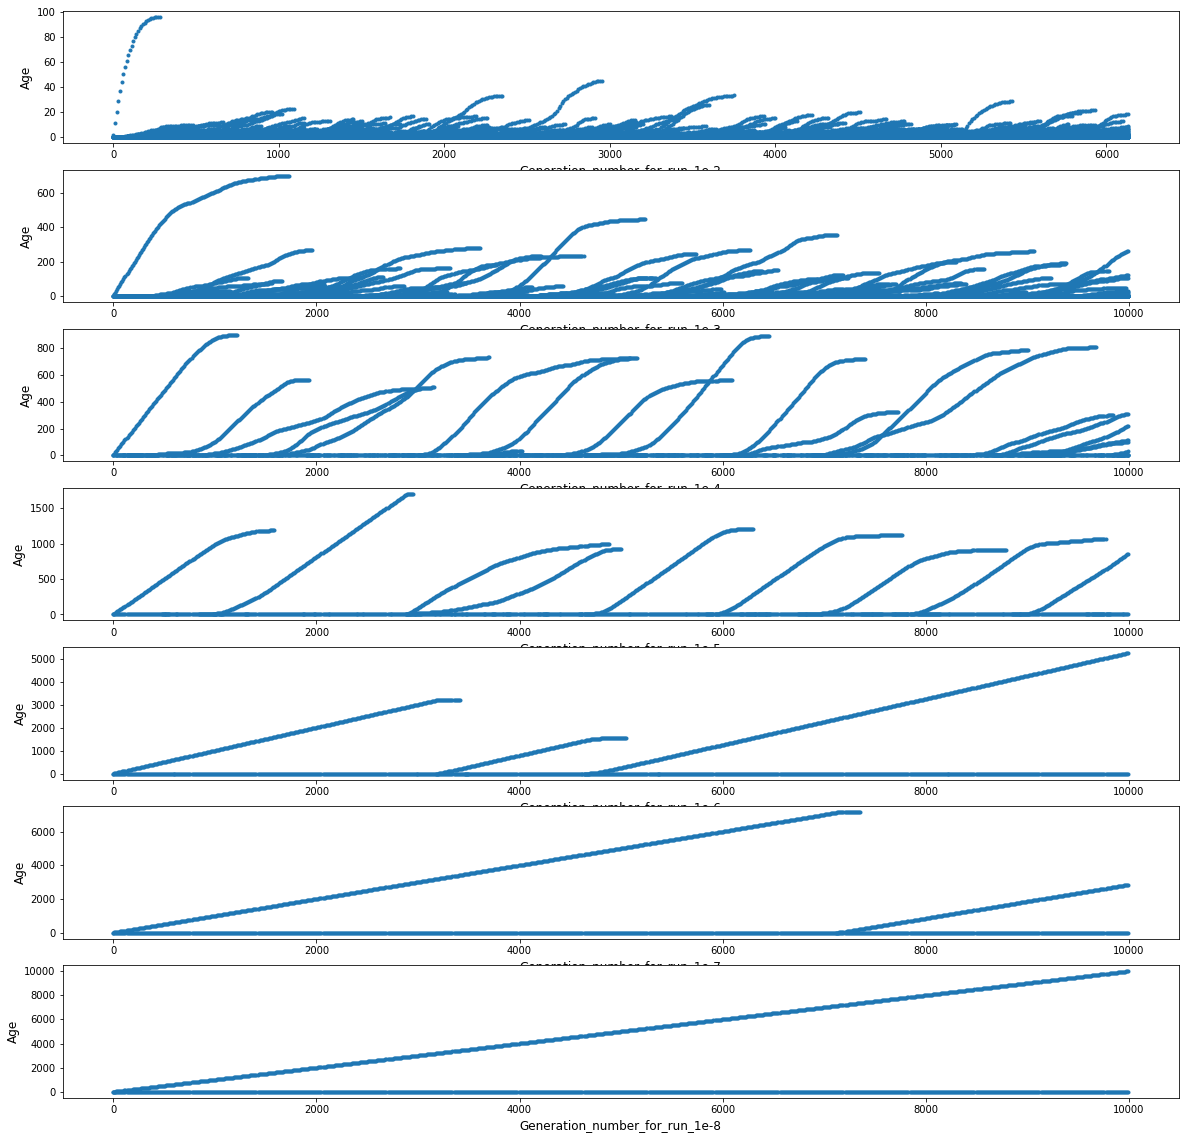

In [173]:
#params_names=["Frequency","Activity","Age","q_allele"]
plot_data(target_folder_path="analyses/scaling_U_2/",params_names="Age")

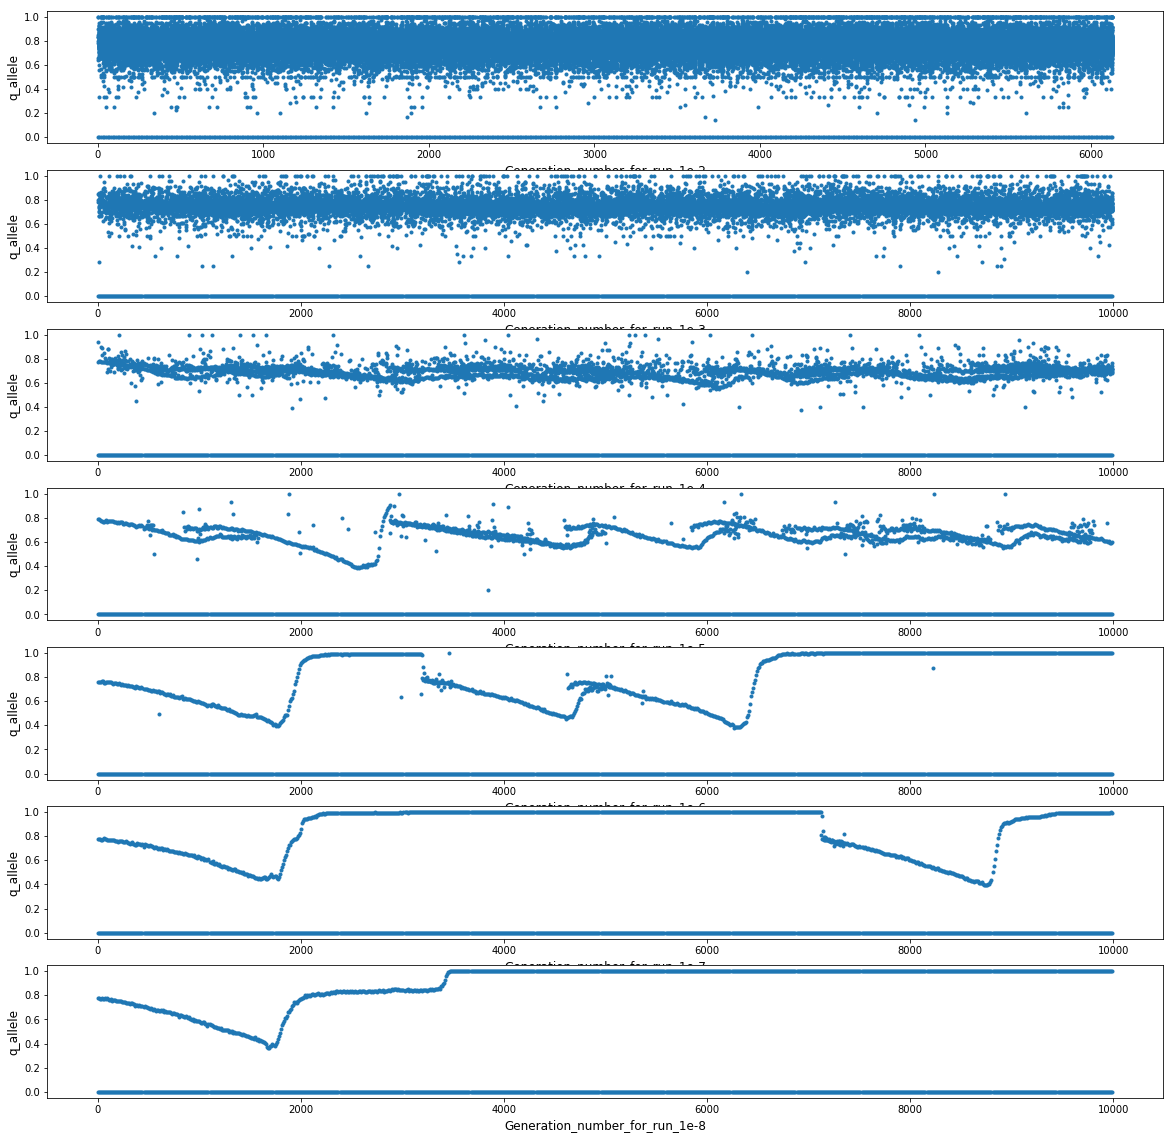

In [172]:
#params_names=["Frequency","Activity","Age","q_allele"]
plot_data(target_folder_path="analyses/scaling_U_2/",params_names="q_allele")